In [12]:
#ファイルの読み込み
import pandas as pd
df1 = pd.read_csv('data_jun.csv')
df1.head()

,year,futoko_rate,stu_per_tch,classes,pass_rate,rate_OII,rate_Lve
0,1991,1.04,18.08,3150,4.2,0.004,1.33
1,1992,1.16,17.81,3150,5.0,0.004,1.39
2,1993,1.24,17.43,3150,6.0,0.006,1.40
3,1994,1.32,17.11,3150,8.0,0.004,1.37
4,1995,1.42,16.86,3150,8.8,0.004,1.37


In [13]:
#欠損値の確認
df1.isnull().sum()

year           0
futoko_rate    0
stu_per_tch    0
classes        0
pass_rate      0
rate_OII       0
rate_Lve       0
dtype: int64

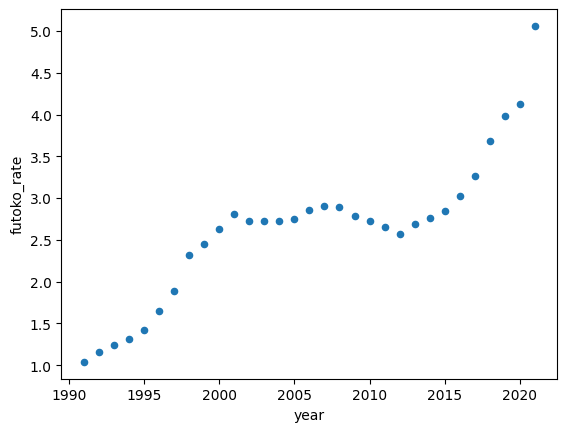

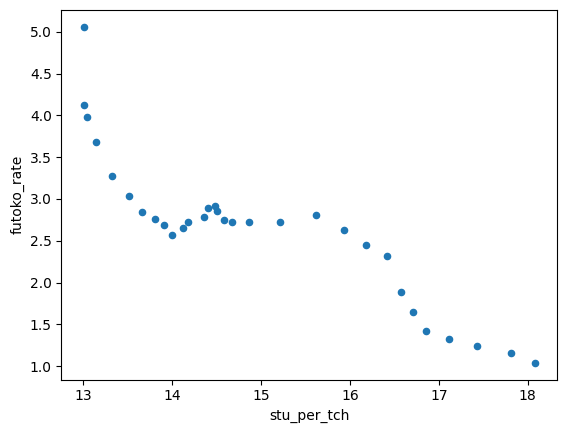

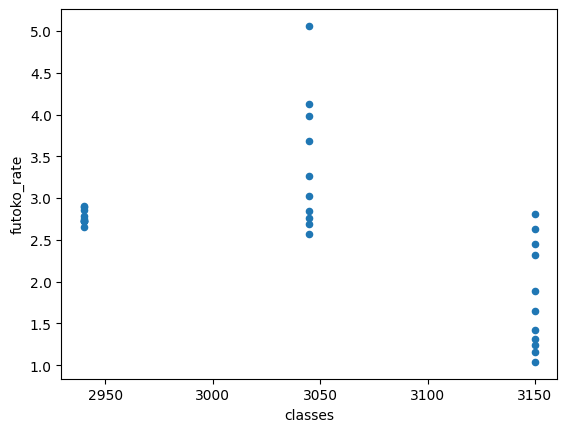

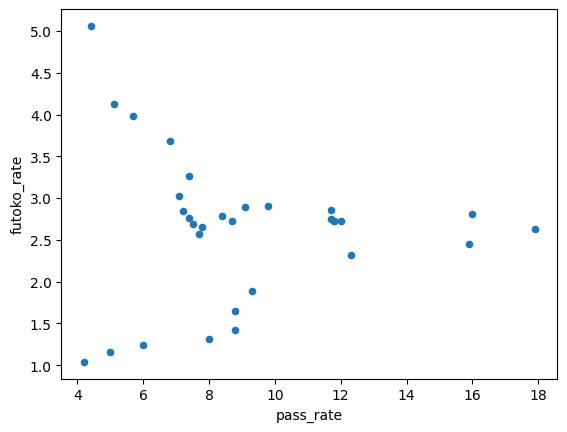

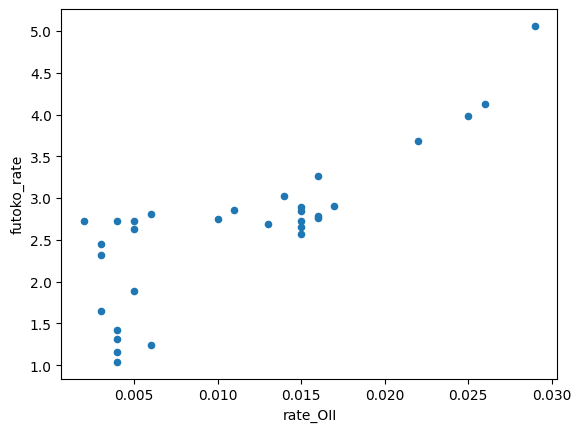

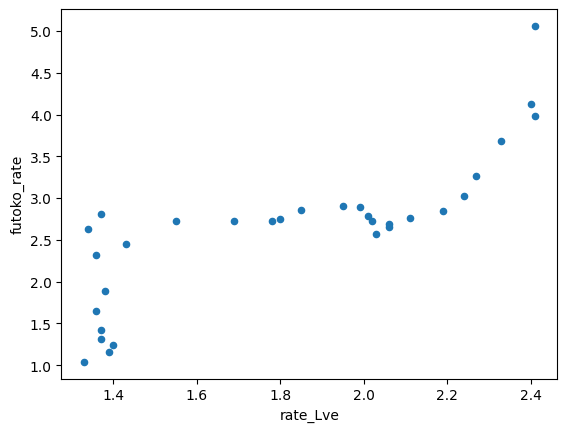

In [14]:
#散布図で相関を見てみる
for i in df1.columns:
    if i == 'futoko_rate':
        continue
    df1.plot(kind = 'scatter', x = i, y = 'futoko_rate')

In [16]:
#特徴量から'year'を削除
df2 = df1.drop(['year'], axis = 1)

#標準化する
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df2)
sc_df1 = sc.transform(df2)
sc_df1 = pd.DataFrame(sc_df1, columns = df2.columns)
sc_df1.head()

,futoko_rate,stu_per_tch,classes,pass_rate,rate_OII,rate_Lve
0,-1.833918,2.060682,1.176697,-1.459897,-0.962980,-1.275417
1,-1.695985,1.880885,1.176697,-1.220285,-0.962980,-1.117476
2,-1.604029,1.627837,1.176697,-0.920769,-0.696441,-1.091153
3,-1.512074,1.414745,1.176697,-0.321738,-0.962980,-1.170123
4,-1.397130,1.248266,1.176697,-0.082125,-0.962980,-1.170123


In [17]:
#不登校率との相関係数を出してみる
abs(sc_df1.corr()['futoko_rate']).sort_values(ascending = False)

futoko_rate    1.000000
stu_per_tch    0.888902
rate_OII       0.817131
rate_Lve       0.814162
classes        0.471835
pass_rate      0.067452
Name: futoko_rate, dtype: float64

In [18]:
#特徴量と正解データに分割
col = ['stu_per_tch', 'rate_OII', 'rate_Lve', 'classes', 'pass_rate']
x = sc_df1[col]
t = sc_df1['futoko_rate']

In [19]:
#訓練データとテストデータの分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,t, test_size = 0.2, random_state = 0)

#モデルを作成し学習させる
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) 

LinearRegression()

In [20]:
#決定係数を出してみる
model.score(x_test, y_test)

0.9385434088106759

In [21]:
#相関行列
sc_df1.corr()

,futoko_rate,stu_per_tch,classes,pass_rate,rate_OII,rate_Lve
futoko_rate,1.000000,-0.888902,-0.471835,-0.067452,0.817131,0.814162
stu_per_tch,-0.888902,1.000000,0.636384,0.180776,-0.832691,-0.942097
classes,-0.471835,0.636384,1.000000,0.003828,-0.387998,-0.559045
pass_rate,-0.067452,0.180776,0.003828,1.000000,-0.520225,-0.475917
rate_OII,0.817131,-0.832691,-0.387998,-0.520225,1.000000,0.923071
rate_Lve,0.814162,-0.942097,-0.559045,-0.475917,0.923071,1.000000
